In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Cargo.csv')

In [4]:
df.head()

,Month,Cargo Traffic (‘000 Tonnes)
0,1995-01-01,8005
1,1996-01-01,8884
2,1997-01-01,12453
3,1998-01-01,15282
4,1999-01-01,14206


In [5]:
df.tail()

,Month,Cargo Traffic (‘000 Tonnes)
21,2016-01-01,35582
22,2017-01-01,39945
23,2018-01-01,42055
24,2019-01-01,42508
25,2020-01-01,39145


In [6]:
df.columns=["Year","Cargo"]
df.head()

,Year,Cargo
0,1995-01-01,8005
1,1996-01-01,8884
2,1997-01-01,12453
3,1998-01-01,15282
4,1999-01-01,14206


In [7]:
df['Year']=pd.to_datetime(df['Year'])

In [8]:
df.head()

,Year,Cargo
0,1995-01-01,8005
1,1996-01-01,8884
2,1997-01-01,12453
3,1998-01-01,15282
4,1999-01-01,14206


In [9]:
df.set_index('Year',inplace=True)
df.head()

,Cargo
Year,
1995-01-01,8005
1996-01-01,8884
1997-01-01,12453
1998-01-01,15282
1999-01-01,14206


In [10]:
df.describe()

,Cargo
count,26.000000
mean,28663.076923
std,11055.865969
min,8005.000000
25%,17672.750000
50%,33416.000000
75%,36659.750000
max,42508.000000


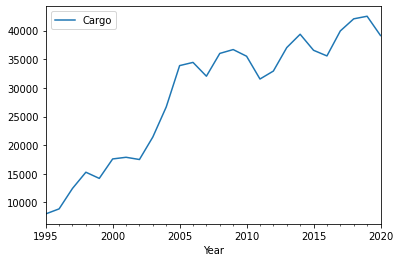

In [11]:
df.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def adfuller_test(Cargo):
    result=adfuller(Cargo)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adfuller_test(df['Cargo'])

ADF Test Statistic : -4.29279134112987
p-value : 0.0004571553046200861
#Lags Used : 7
Number of Observations Used : 18
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


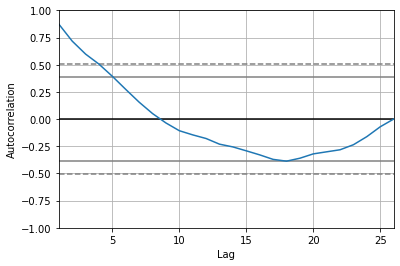

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Cargo'])
plt.show()

In [16]:
import statsmodels.api as sm

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


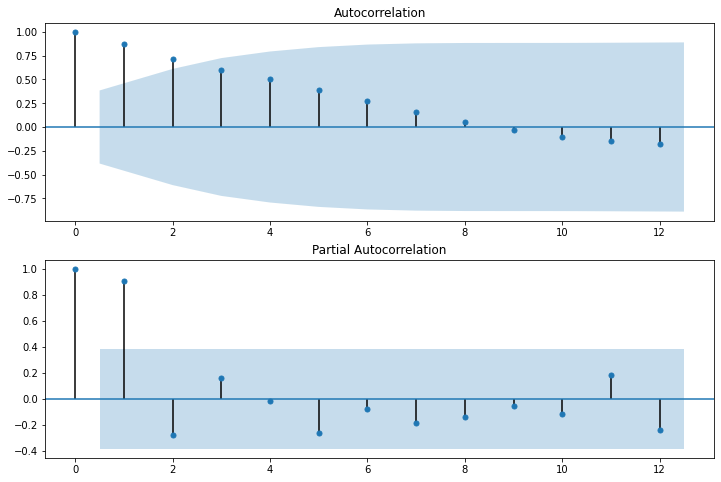

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Cargo'],lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Cargo'],lags=12,ax=ax2)

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model=ARIMA(df['Cargo'],order=(1,0,1))
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will b

In [27]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Cargo   No. Observations:                   26
Model:                     ARMA(1, 1)   Log Likelihood                -244.701
Method:                       css-mle   S.D. of innovations           2773.039
Date:                Wed, 01 Feb 2023   AIC                            497.402
Time:                        10:43:43   BIC                            502.435
Sample:                    01-01-1995   HQIC                           498.851
                         - 01-01-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.506e+04   1.01e+04      2.486      0.013    5304.654    4.48e+04
ar.L1.Cargo     0.9458      0.057     16.449      0.000       0.833       1.058
ma.L1.Cargo     0.5248      0.204      2.570      0.010       0.124       0.925
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0573           +0.0000j            1.0573            0.0000
MA.1           -1.9056           +0.0000j            1.9056            0.5000
-----------------------------------------------------------------------------
"""

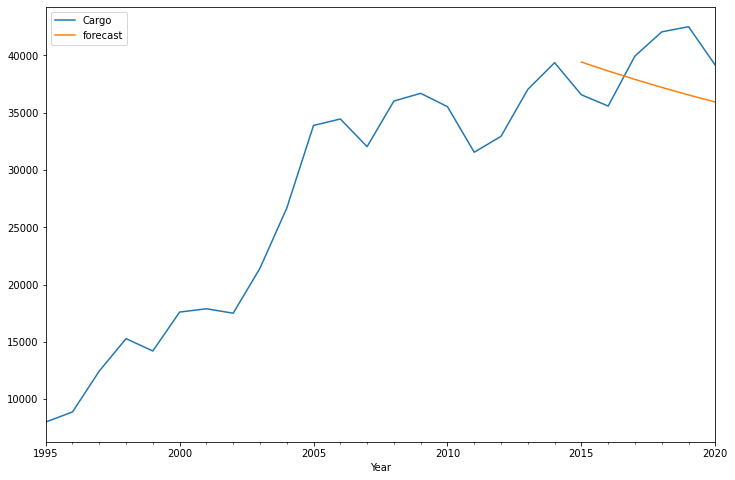

In [28]:
df['forecast']=model_fit.predict(start=20,end=26,dynamic=True)
df[['Cargo','forecast']].plot(figsize=(12,8))

In [54]:
model=sm.tsa.statespace.SARIMAX(df['Cargo'],order=(1, 0, 1),seasonal_order=(1,1,1,5))
results=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


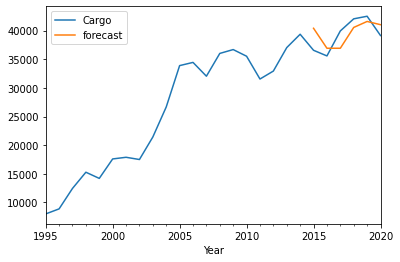

In [55]:
df['forecast']=results.predict(start=20,end=26,dynamic=True)
df[['Cargo','forecast']].plot()

In [56]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,21)]

In [57]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [58]:
future_datest_df.tail()

,Cargo,forecast
2036-01-01,NaN,NaN
2037-01-01,NaN,NaN
2038-01-01,NaN,NaN
2039-01-01,NaN,NaN
2040-01-01,NaN,NaN


In [59]:
future_df=pd.concat([df,future_datest_df])

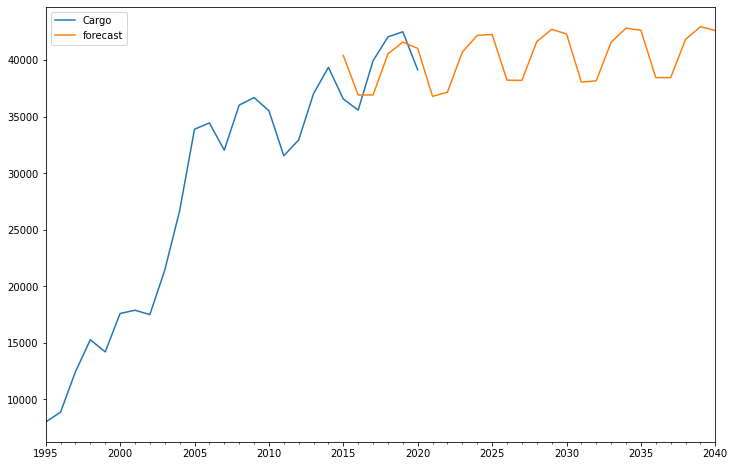

In [62]:
future_df['forecast'] = results.predict(start = 20, end = 46, dynamic= True)  
future_df[['Cargo', 'forecast']].plot(figsize=(12, 8))

In [63]:
future_df[['Cargo', 'forecast']]

,Cargo,forecast
1995-01-01,8005,NaN
1996-01-01,8884,NaN
1997-01-01,12453,NaN
1998-01-01,15282,NaN
1999-01-01,14206,NaN
2000-01-01,17600,NaN
2001-01-01,17891,NaN
2002-01-01,17501,NaN
2003-01-01,21430,NaN
2004-01-01,26673,NaN
